In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os
import librosa
import librosa.display
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
# from keras.models import Sequential
# import tensorflow as tf
# from tensorflow import keras 
import numpy as np
import pandas as pd
import seaborn as sns

C:\Users\rohit\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## DATABASE GENERATION FROM AUDIO FILES

In [3]:
# a function to extract different components of the audio file
def feature_retrival(data,tempo,sr):
    row = []
    column = []

    y_harm, y_perc = librosa.effects.hpss(y=data)

    stft=librosa.feature.chroma_stft(y=data,sr=sr)
    row.extend([np.mean(stft)])
    row.extend([np.var(stft)])

    rms = librosa.feature.rms(y=data)
    row.extend([np.mean(rms)])
    row.extend([np.var(rms)])

    centroid = librosa.feature.spectral_centroid(y=data)
    row.extend([np.mean(centroid)])
    row.extend([np.var(centroid)])

    bandwidth = librosa.feature.spectral_bandwidth(y=data)
    row.extend([np.mean(bandwidth)])
    row.extend([np.var(bandwidth)])

    rolloff = librosa.feature.spectral_rolloff(y=data)
    row.extend([np.mean(rolloff)])
    row.extend([np.var(rolloff)])

    crossing = librosa.feature.zero_crossing_rate(y=data)
    row.extend([np.mean(crossing)])
    row.extend([np.var(crossing)])

    row.extend([np.mean(y_harm)])
    row.extend([np.var(y_harm)])

    row.extend([np.mean(y_perc)])
    row.extend([np.var(y_perc)])

    row.extend([tempo])

    for i in librosa.feature.mfcc(y=data):
        row.extend([np.mean(i)])
        row.extend([np.var(i)])

    return row

In [4]:
import os
import warnings
warnings.filterwarnings("ignore")

path = "genres_original"
dataset = []
y = []

# Reading the Folders
for i,folder in enumerate(os.listdir(path)):
    for j,file in enumerate(os.listdir(path+'/'+folder)):
        print(i,j,file)

        # Read the Audio File
        try: 
            data , sample_rate = librosa.load(path+'/'+folder+'/'+file,sr = 22050)
            # print(librosa.effects.trim(data))
            data = librosa.effects.trim(data)[0]
        except:
            print("File ::",file,"is corrupt")
            continue

        # Breaks the 30 second file into 3 seconds interval and then add it to database
        gap = sample_rate*3
        tempo = librosa.beat.beat_track(y=data, sr = sample_rate)[0]
        for k in np.arange(0,len(data)-gap,gap):
            lower = int(k)
            upper = int(k + gap)

            row = feature_retrival(data[lower:upper],tempo,sample_rate)
            dataset.append(np.array(row))
            y.append(folder)

# converting data into pandas format
y = pd.DataFrame(y)

0 0 blues.00000.wav
0 1 blues.00001.wav
0 2 blues.00002.wav
0 3 blues.00003.wav
0 4 blues.00004.wav
0 5 blues.00005.wav
0 6 blues.00006.wav
0 7 blues.00007.wav
0 8 blues.00008.wav
0 9 blues.00009.wav
0 10 blues.00010.wav
0 11 blues.00011.wav
0 12 blues.00012.wav
0 13 blues.00013.wav
0 14 blues.00014.wav
0 15 blues.00015.wav
0 16 blues.00016.wav
0 17 blues.00017.wav
0 18 blues.00018.wav
0 19 blues.00019.wav
0 20 blues.00020.wav
0 21 blues.00021.wav
0 22 blues.00022.wav
0 23 blues.00023.wav
0 24 blues.00024.wav
0 25 blues.00025.wav
0 26 blues.00026.wav
0 27 blues.00027.wav
0 28 blues.00028.wav
0 29 blues.00029.wav
0 30 blues.00030.wav
0 31 blues.00031.wav
0 32 blues.00032.wav
0 33 blues.00033.wav
0 34 blues.00034.wav
0 35 blues.00035.wav
0 36 blues.00036.wav
0 37 blues.00037.wav
0 38 blues.00038.wav
0 39 blues.00039.wav
0 40 blues.00040.wav
0 41 blues.00041.wav
0 42 blues.00042.wav
0 43 blues.00043.wav
0 44 blues.00044.wav
0 45 blues.00045.wav
0 46 blues.00046.wav
0 47 blues.00047.wav
0 

Creating & Saving the dataset

In [5]:
columns = ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']

dataset = pd.DataFrame(dataset,columns=columns)
dataset['label'] = y
dataset.to_csv("features_generated3.csv")

## Preprocessing the data

In [6]:
info = pd.read_csv('features_generated3.csv')

In [7]:
datas = info.drop(columns=['label','Unnamed: 0'])
# datas = info.drop(columns=['label','filename','length'])
# from sklearn.preprocessing import StandardScaler

# shape = StandardScaler()
# for i in datas.columns[1:-1]:
#     datas[i] = shape.fit_transform(pd.DataFrame(datas[i]))

In [8]:
enco = LabelEncoder()
y = enco.fit_transform(info['label']) 
# y

In [9]:
x_train,x_test,y_train,y_test = tts(datas, y, test_size=0.3)

## Models

In [11]:
from sklearn.model_selection import cross_val_score as cv
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier as XGC

Logistic Regression

In [12]:
test_model = LogisticRegression(max_iter=10000)
scores = cv(test_model,x_train,y_train,cv=5)
print("CV score for logistic regression ::",np.mean(scores))

CV score for logistic regression :: 0.4481030780243378


SGD Classifier

In [13]:
from sklearn.linear_model import SGDClassifier 
test_model = SGDClassifier()
scores = cv(test_model,x_train,y_train,cv=5)
print("CV score for SGD ::",np.mean(scores))

CV score for SGD :: 0.15232641374373657


Support Vector Machine

In [14]:
from sklearn.svm import SVC
test_model = SVC()
scores = cv(test_model,x_train,y_train,cv=5)
print("CV score for Support vector machine ::",np.mean(scores))

CV score for Support vector machine :: 0.2761632068718683


KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
test_model = KNeighborsClassifier()
scores = cv(test_model,x_train,y_train,cv=5)
print("CV score for KNN ::",np.mean(scores))

CV score for KNN :: 0.270722977809592


Gaussian Naïve Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
test_model = GaussianNB()
scores = cv(test_model,x_train,y_train,cv=5)
print("CV score for Naive bayes ::",np.mean(scores))

CV score for Naive bayes :: 0.4226198997852541


Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
test_model = DecisionTreeClassifier()
scores = cv(test_model,x_train,y_train,cv=5)
print("CV score for Decision Tree ::",np.mean(scores))

CV score for Decision Tree :: 0.628489620615605


XGBoost Classifier

In [18]:
from sklearn.model_selection import cross_val_score as cv
test_model = XGC(use_label_encoder=False,eval_metric='mlogloss')
scores = cv(test_model,x_train,y_train,cv=5)
print("CV score for XGBoost ::",np.mean(scores))

CV score for XGBoost :: 0.8913385826771654


AdaBoostClassifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier
test_model = AdaBoostClassifier()
scores = cv(test_model,x_train,y_train,cv=5)
print("CV score for AdaBoost ::",np.mean(scores))

CV score for AdaBoost :: 0.466857551896922


Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

test_model = RandomForestClassifier()
scores = cv(test_model,x_train,y_train,cv=5)
print("CV score for Random Forest ::",np.mean(scores))

CV score for Random Forest :: 0.8545454545454545


Neural Network

In [21]:
from sklearn.neural_network import MLPClassifier

test_model = MLPClassifier(hidden_layer_sizes=(56,56,),max_iter=1000)
scores = cv(test_model,x_train,y_train,cv=5)
print("CV score for Neural Network ::",np.mean(scores))

CV score for Neural Network :: 0.20687186828919116


LightGBM Classifier

In [22]:
from lightgbm import LGBMClassifier
test_model = LGBMClassifier()
scores = cv(test_model,x_train,y_train,cv=5)
print("CV score for LGBM ::",np.mean(scores))

CV score for LGBM :: 0.9079455977093772


## Hyper parameter Tuning

In [51]:
from sklearn.metrics import accuracy_score as acc

In [25]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'max_depth':range(10,15),'learning_rate':np.arange(0.2,0.3,0.01),'path_smooth':range(30,40,2),'max_bin':range(80,120,5)}
model = LGBMClassifier()
clf = RandomizedSearchCV(model, parameters,cv=5)
clf.fit(x_train,y_train)
clf.best_params_

{'path_smooth': 38,
 'max_depth': 10,
 'max_bin': 90,
 'learning_rate': 0.26000000000000006}

In [26]:
# model = XGC(use_label_encoder=False,eval_metric='mlogloss')
model = LGBMClassifier(max_depth=12,learning_rate=0.26,path_smooth=32,max_bin=105)
model.fit(x_train,y_train)
ans = model.predict(x_test)
print(acc(y_test,ans))

0.938877755511022


In [27]:
joblib.dump(model, 'classifier.pkl')
joblib.dump(enco, 'encoder.pkl')

['encoder.pkl']

In [28]:
print(acc(y_train,model.predict(x_train)))

0.9992841803865425


## Final function for prediction

In [53]:
model_file = "classifier.pkl"
encoder = "encoder.pkl"
def Music_Classifier(path):
    audio_data , sample_rate = librosa.load(path)
    audio_data = librosa.effects.trim(audio_data)[0]

    tempo = librosa.beat.beat_track(y=audio_data, sr = sample_rate)[0]

    features = []
    gap = sample_rate * 3
    for k in np.arange(0,len(audio_data)-gap,gap):
        lower = int(k)
        upper = int(k + gap)

        feature_row = feature_retrival(audio_data[lower:upper], tempo, sample_rate)
        features.append(np.array(feature_row))

    features = pd.DataFrame(features)

    classifier = joblib.load(model_file)
    ans = classifier.predict(features)

    # print(ans)

    decode = joblib.load(encoder)
    return decode.inverse_transform([pd.DataFrame(ans).mode()[0][0]])[0]

Music_Classifier("C:/Users/rohit/Downloads/Olivia_Rodrigo_-_Drivers_License_Correctvibe.com__1.wav")

'pop'

In [30]:
# from pydub import AudioSegment
# sound = AudioSegment.from_mp3("C:/Users/rohit/Downloads/i_need_girl.mp3")
# print(len(sound.get_array_of_samples()))
# print(sound.frame_rate)
# datasm = np.array(sound.get_array_of_samples()).astype(np.float32)
# print(enco.inverse_transform([predict(model,datasm,sound.frame_rate)])[0])

# import IPython.display as ipd
# from IPython.display import Audio
# ipd.Audio('/content/drive/MyDrive/Colab Notebooks/PRML Project/genres_original/metal/metal.00010.wav')

# VISUALISING DATASET FROM .CSV FILES

In [33]:
dataset = pd.read_csv('features_generated3.csv')
dataset.head()

,Unnamed: 0,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0,0.335555,0.090997,0.130189,0.003559,1773.358004,169450.829520,1972.334258,117272.640189,3714.063439,...,39.547073,-3.230046,36.606861,0.696385,37.766132,-5.035945,33.668549,-0.239585,43.818878,blues
1,1,0.343523,0.086782,0.112119,0.001491,1817.244034,90766.297254,2010.751494,65940.666243,3870.510442,...,64.819771,-6.025472,40.548809,0.127131,51.048935,-2.808956,97.221497,5.771882,60.360344,blues
2,2,0.347746,0.092495,0.130895,0.004552,1790.722357,110071.206973,2088.184750,73391.498001,4000.206581,...,68.306793,-1.714475,28.136948,2.329553,47.211426,-1.925621,52.922436,2.466996,33.164001,blues
3,3,0.363863,0.087207,0.131349,0.002338,1660.545231,109496.936296,1967.920582,79805.901351,3579.149639,...,48.543198,-3.786987,28.419542,1.153315,35.682701,-3.501979,50.610344,3.580636,32.325871,blues
4,4,0.335481,0.088482,0.142370,0.001734,1634.465077,77425.419232,1954.633566,57359.695604,3480.096905,...,30.829540,0.635797,44.645557,1.591108,51.415867,-3.364909,26.421085,0.501505,29.109529,blues


In [50]:
dataset = dataset.drop(columns='Unnamed: 0')

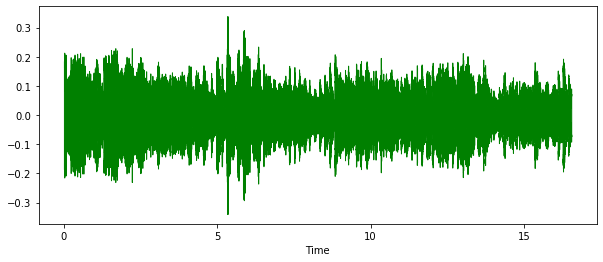

In [3]:
import librosa.display
x1, sr = librosa.load('genres_original/classical/classical.00002.wav')
plt.figure(figsize = (10, 4))
librosa.display.waveshow(x1, sr=sr, color = 'g')

A function that takes a time-domain signal and decomposes it into frequencies as an output. Both the y-axis (frequency) and the "colour" axis (amplitude) should be converted to Decibels, which is close to the log scale of amplitudes.

Text(0.5, 1.0, 'Short-time Fourier Transform')

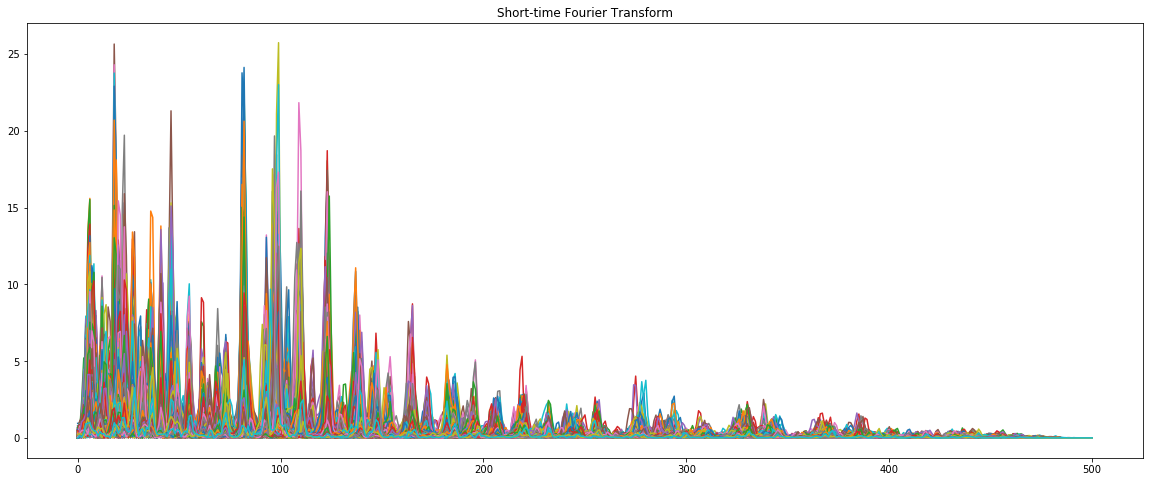

In [5]:
audio_file, _ = librosa.effects.trim(x1)

fft_wsize = 1000
audio_fr = 500 # number audio of frames between STFT columns 
Fourier = np.abs(librosa.stft(audio_file, n_fft = fft_wsize, hop_length = audio_fr))
plt.figure(figsize = (20, 8))
plt.plot(Fourier);  #Fourier transform plot
# plt.xlabel("amplituse")
# plt.ylabel("Frequency")
plt.title("Short-time Fourier Transform")

Converting an amplitude spectrogram to Decibels-scaled spectrogram.

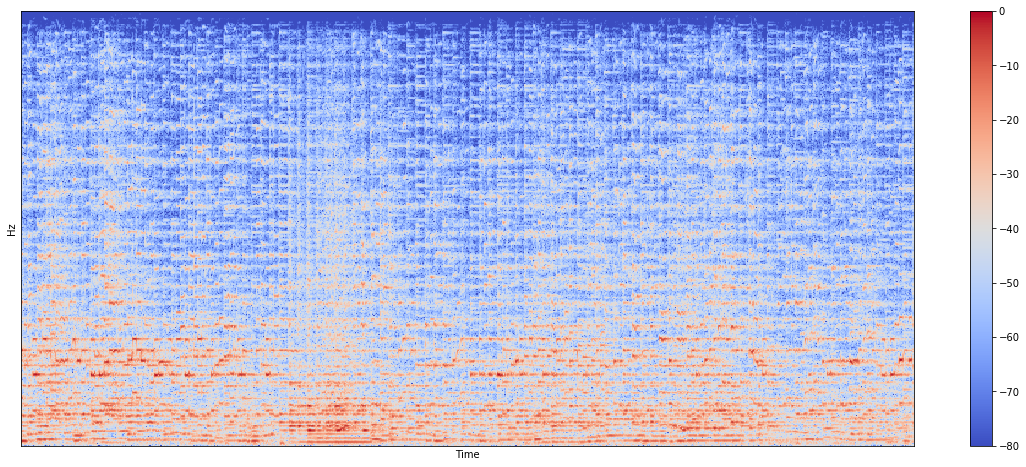

In [6]:
Decibel = librosa.amplitude_to_db(Fourier, ref = np.max)
plt.figure(figsize = (20, 8))
librosa.display.specshow(Decibel, sr = sr, hop_length = audio_fr, cmap = "coolwarm")
plt.xlabel("Time")
plt.ylabel("Hz")
plt.colorbar();

Harmonics are characteristics that cannot be distinguished by human years (represents the sound color) whereas the sound rhythm and emotion are represented by the shock wave in perceptual comprehension.

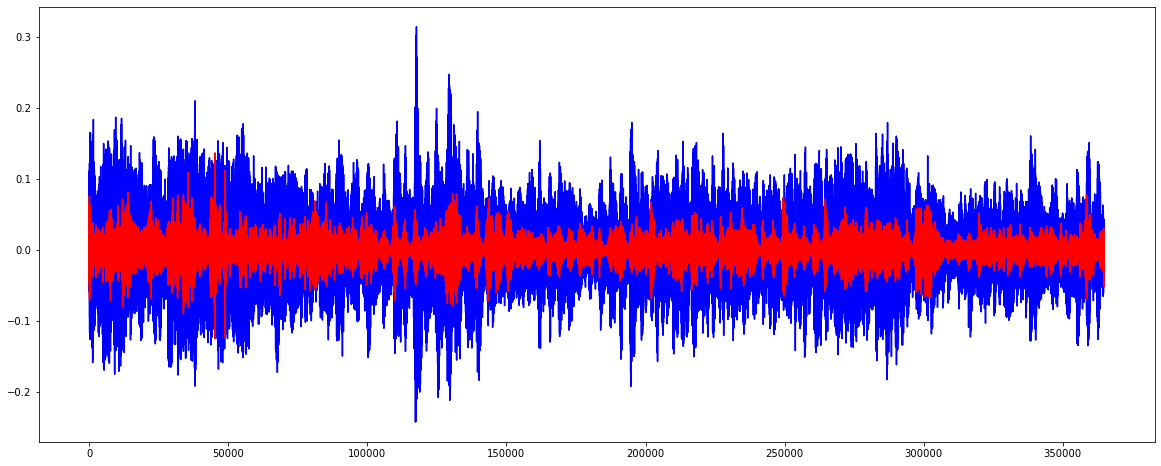

In [7]:
y_har, y_per = librosa.effects.hpss(audio_file)
plt.figure(figsize = (20, 8))
plt.plot(y_har, color = 'b');
plt.plot(y_per, color = 'r');

Chroma features a fascinating and strong representation for music audio as the full spectrum is projected into 12 bins reflecting the 12 unique semitones (or chroma) of the musical octave

C:\Users\rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[-0.0390753  -0.08967598 -0.10406392 ... -0.10334627 -0.07637467
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


Text(0, 0.5, 'chroma')

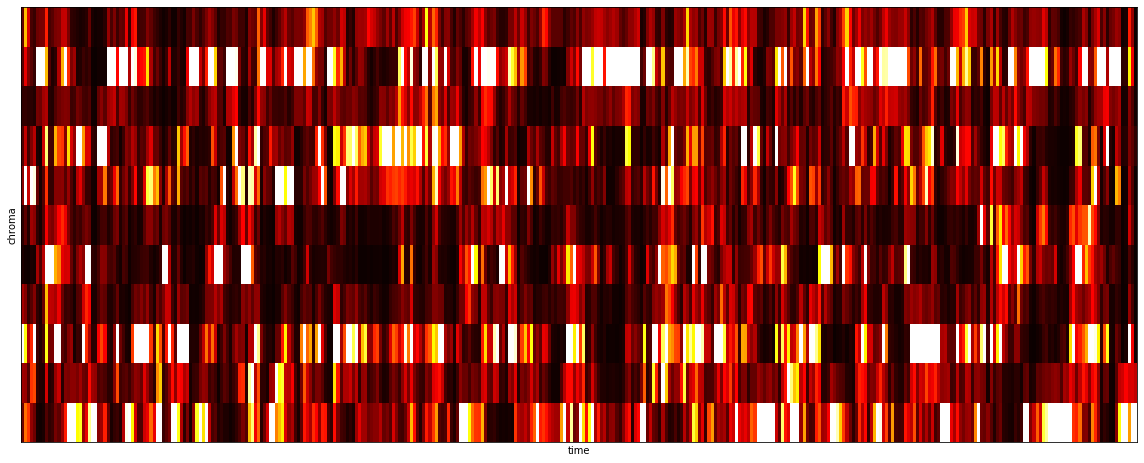

In [8]:
hop_length = 1000
chromagram = librosa.feature.chroma_stft(audio_file, sr = sr, hop_length = hop_length)
plt.figure(figsize=(20, 8))
librosa.display.specshow(chromagram, hop_length=hop_length, cmap='hot');
plt.xlabel("time")
plt.ylabel("chroma")

A signal's Mel frequency cepstral coefficients (MFCCs) are a short group of characteristics (often 10–20) that concisely describe the overall shape of a spectral envelope. It simulates the features of human speech.

C:\Users\rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[-0.0390753  -0.08967598 -0.10406392 ... -0.10334627 -0.07637467
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


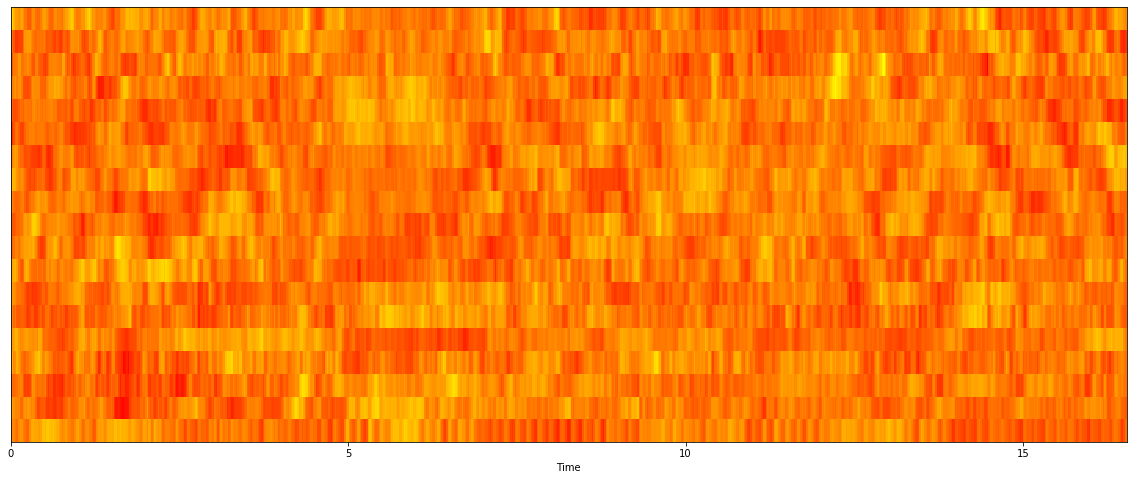

In [9]:
from sklearn.preprocessing import scale
mfccs = librosa.feature.mfcc(audio_file, sr=sr)
mfccs = scale(mfccs, axis=1)
plt.figure(figsize = (20, 8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'autumn');

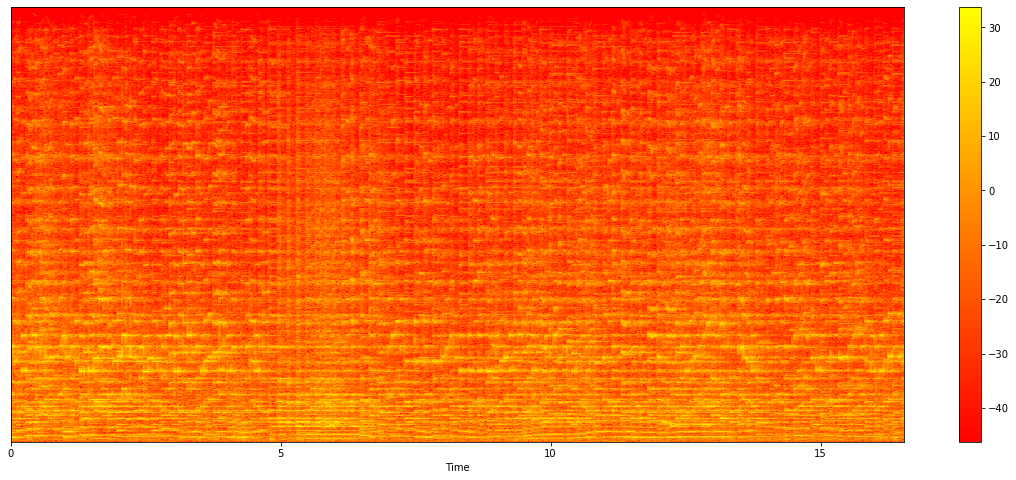

In [11]:
stft = librosa.stft(x1)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(20, 8))
librosa.display.specshow(stft_db, sr=sr, x_axis = 'time', cmap = "autumn")
plt.colorbar()

# **EDA**

Correlation Heatmap for feature means

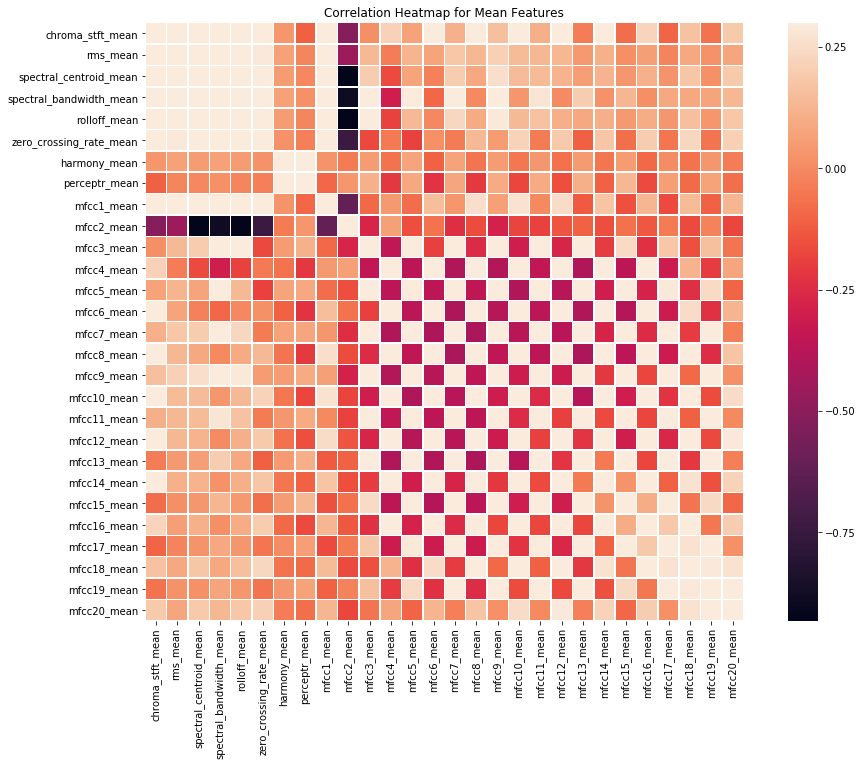

In [46]:
columns = [column for column in info.columns if 'mean' in column]
corr = info[columns].corr()

plt.subplots(figsize=(16, 11))
plt.title('Correlation Heatmap for Mean Features')
sns.heatmap(corr, vmax=.3,square=True, linewidths=.5,cmap="rocket")
plt.savefig("Corr Heatmap.jpg")

BoxPlot

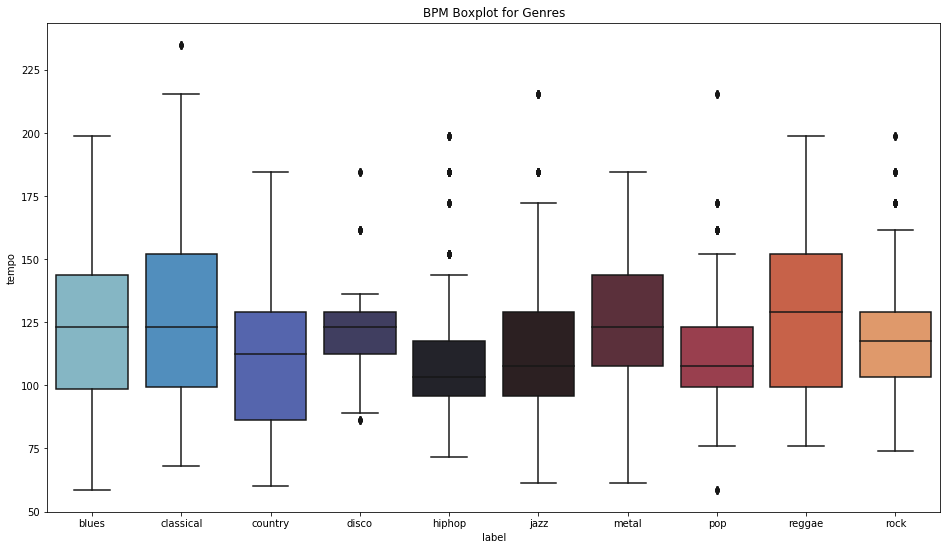

In [47]:
x = dataset[["label", "tempo"]]
color = {"blues":"g","classical":"c","country":"y","disco":"o","hiphop":"r","jazz":"p","metal":"v","pop":"i","reggae":"b","rock":"w"}
f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = "icefire");

plt.title('BPM Boxplot for Genres')
plt.savefig("BPM Boxplot.jpg")

PCA in Scatter Plot

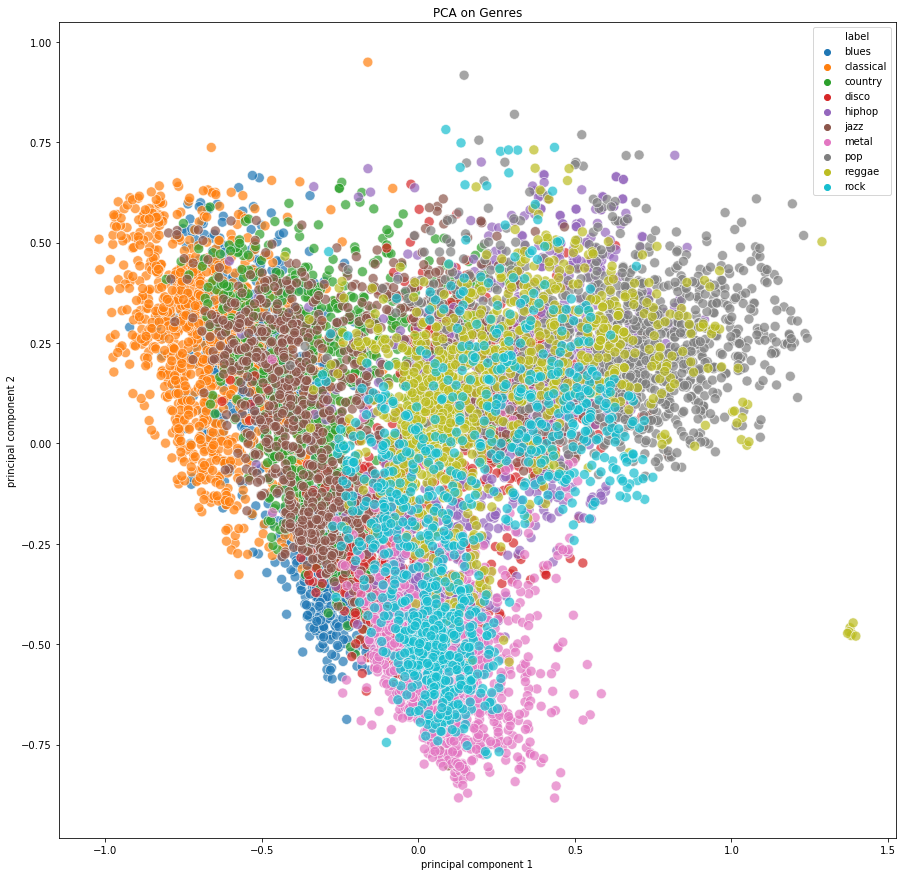

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

y = dataset['label']
X = dataset.drop(columns='label')

min_max_scaler = MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns = X.columns)

pca = PCA(n_components = 2)
principalDf = pd.DataFrame(pca.fit_transform(X), columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (15,15))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7, s = 100);
plt.title('PCA on Genres')
plt.savefig("PCA Scattert.jpg")
# plt.xlabel("Component 1")
# plt.ylabel("Component 2")

# Standalone Prediction Code

    this code can be run independently (if atleast once the model has been saved (just run code once)) 
    this can be run and it will give a window pop up.
    you need to select a .wav format file and wait for a few minutes.
    it will display the genre when the processing is complete.

In [49]:
import pandas as pd
import numpy as np
import pandas.util.testing as tm
import librosa
import joblib
from tkinter import *
from tkinter import filedialog


# a function to extract different components of the audio file
def feature_retrival(data,tempo,sr):
    row = []
    column = []

    y_harm, y_perc = librosa.effects.hpss(y=data)

    stft=librosa.feature.chroma_stft(y=data,sr=sr)
    row.extend([np.mean(stft)])
    row.extend([np.var(stft)])

    rms = librosa.feature.rms(y=data)
    row.extend([np.mean(rms)])
    row.extend([np.var(rms)])

    centroid = librosa.feature.spectral_centroid(y=data)
    row.extend([np.mean(centroid)])
    row.extend([np.var(centroid)])

    bandwidth = librosa.feature.spectral_bandwidth(y=data)
    row.extend([np.mean(bandwidth)])
    row.extend([np.var(bandwidth)])

    rolloff = librosa.feature.spectral_rolloff(y=data)
    row.extend([np.mean(rolloff)])
    row.extend([np.var(rolloff)])

    crossing = librosa.feature.zero_crossing_rate(y=data)
    row.extend([np.mean(crossing)])
    row.extend([np.var(crossing)])

    row.extend([np.mean(y_harm)])
    row.extend([np.var(y_harm)])

    row.extend([np.mean(y_perc)])
    row.extend([np.var(y_perc)])

    row.extend([tempo])

    for i in librosa.feature.mfcc(y=data):
        row.extend([np.mean(i)])
        row.extend([np.var(i)])

    return row

model_file = "classifier.pkl"
encoder = "encoder.pkl"

def Music_Classifier(path):
    audio_data , sample_rate = librosa.load(path)
    audio_data = librosa.effects.trim(audio_data)[0]

    tempo = librosa.beat.beat_track(y=audio_data, sr = sample_rate)[0]

    features = []
    gap = sample_rate * 3
    for k in np.arange(0,len(audio_data)-gap,gap):
        lower = int(k)
        upper = int(k + gap)

        feature_row = feature_retrival(audio_data[lower:upper], tempo, sample_rate)
        features.append(np.array(feature_row))

    features = pd.DataFrame(features)

    classifier = joblib.load(model_file)
    ans = classifier.predict(features)

    # print(ans)

    decode = joblib.load(encoder)
    return decode.inverse_transform([pd.DataFrame(ans).mode()[0][0]])[0]

def sure(chats,filepath):
    if(filepath[-3:]=="wav"):
        chats.configure(text = "Predicting...")
    else:
        chats.configure(text = "Choose a Wave File")
        return

    genre = Music_Classifier(filepath)
    chats.configure(text = "The Genre of the Music is :: "+genre)
    return

def browseFiles(chats):
    filepath = filedialog.askopenfilename(initialdir = "/",title = "Select an Audio File")
    chats.configure(text = filepath)
    sure(chats,filepath)
    return

gui = Tk()
path = StringVar()

chats = Label(gui,text="MUSIC GENRE CLASSIFICATION\n\nSelect the file using the button.\nWait for a few mins to see the genre\n",bd=5,height=10,width=30,bg="#ABCDEF",relief="solid")
chats.place(relx = 0.5,rely = 0.5,anchor = 'center')
# inputs = Entry(gui,textvariable=path)
# inputs.place(relx = 0.5, rely = 0.5,anchor="center")

sub_btn = Button(gui,text = 'Click to Select the File', command = lambda: browseFiles(chats))
# ans_btn = Button(gui,text = 'Predict Genre', command = lambda: sure(chats))

chats.pack()
chats.pack_propagate(0)
# inputs.pack()
sub_btn.pack()
# ans_btn.pack()

gui.mainloop()